In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt

In [2]:
max_epoch = 4000

val_data = pd.read_csv('./val_metrics.csv')
val_data = val_data.infer_objects()[val_data.epoch < max_epoch]
for col in val_data.columns:
    val_data[col] = pd.to_numeric(val_data[col])
# val_data.head()

In [3]:
train_data = pd.read_csv('./train_metrics.csv')
train_data = train_data.infer_objects()[train_data.epoch < max_epoch]
for col in train_data.columns:
    train_data[col] = pd.to_numeric(train_data[col])
# train_data.head()

In [4]:
plt.rcParams["figure.figsize"] = (16,6)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

epoch = train_data['epoch']
total_time = train_data['time'].sum()

time_h = math.floor(total_time / 3600)
time_m = math.floor((total_time - time_h*3600) / 60)
time_s = math.floor(total_time - time_h*3600 - time_m*60)


params = pd.read_csv('./h_params.csv')
for col in params.columns:
    params[col] = pd.to_numeric(params[col])
    print(f'{col}: {params[col][0]}')
print('')

print(f"Total training time: {time_h}h:{time_m}m:{time_s}s")

tf_emb_dim: 128
tf_ff_size: 128
pool_emb_dim: 128
bottleneck_dim: 32
mlp_dim: 16
noise_dim: 8
layer_count: 1
g_learning_rate: 0.0001219164745904145
d_learning_rate: 9.861375734700142e-05
heads: 4
sgan_d_emb_dim: 32
g_param_count: 1263803
d_param_count: 21665

Total training time: 1h:53m:42s


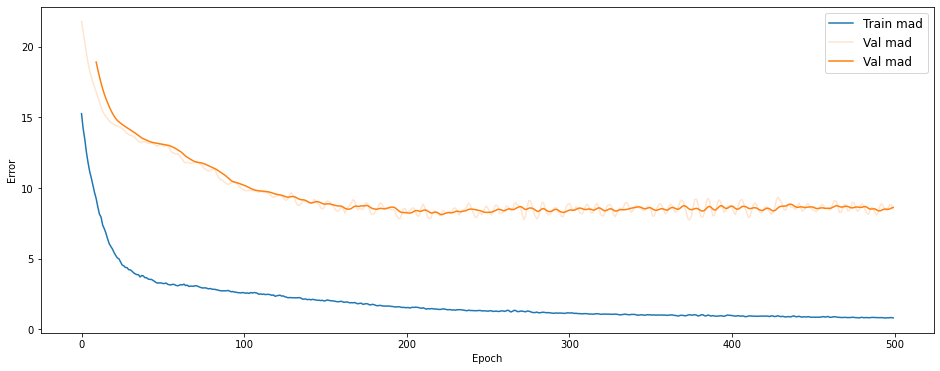

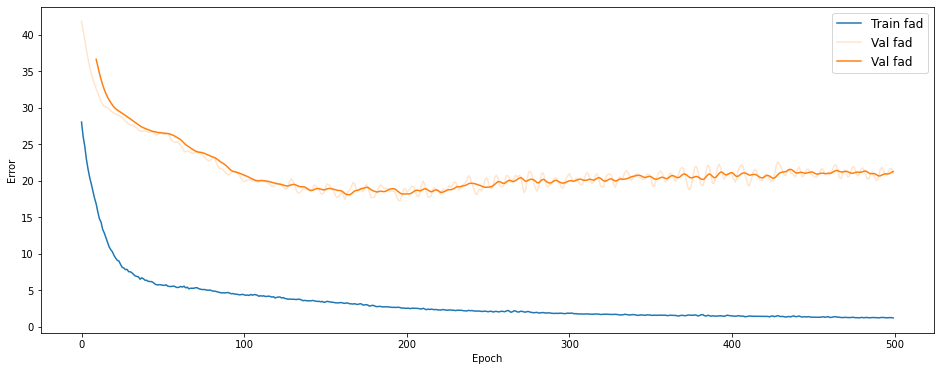

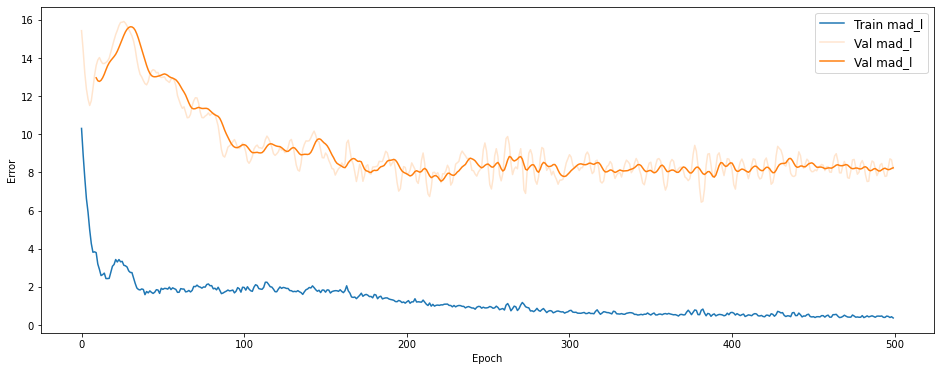

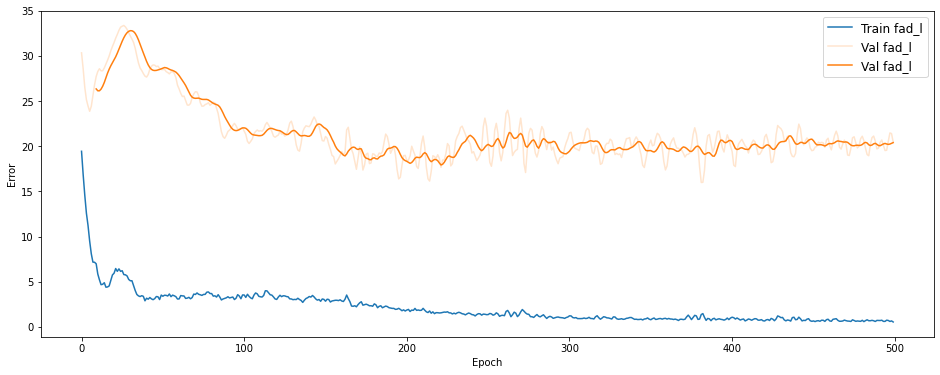

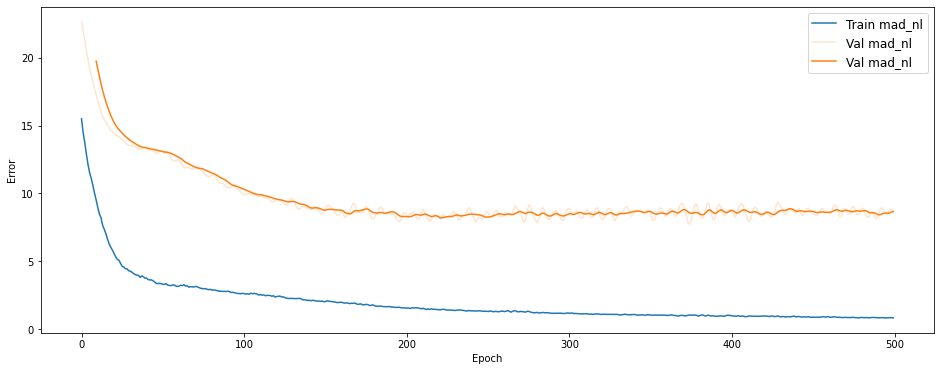

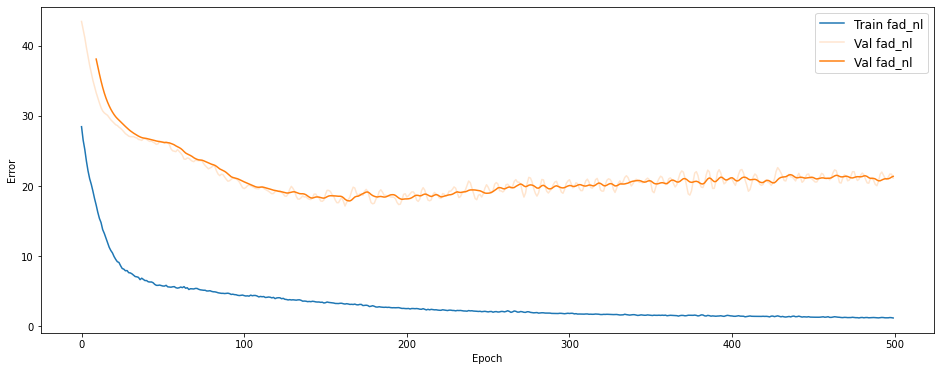

In [5]:
labels = []
rs = [1, 10]

for col in train_data.columns:
    labels.append(col)

for label in labels[3:9]:
    plt.plot(epoch, train_data[label].rolling(rs[0]).mean(), label=f"Train {label}", c=colors[0])
    for i, r in enumerate(rs):
        plt.plot(epoch, val_data[label].rolling(r).mean(), label=f"Val {label}", alpha=float(r/5), c=colors[1])
    #plt.ylim([0, 15])
    plt.ylabel("Error")
    plt.xlabel("Epoch")
    plt.legend(loc='upper right', fontsize='large')
    plt.show()

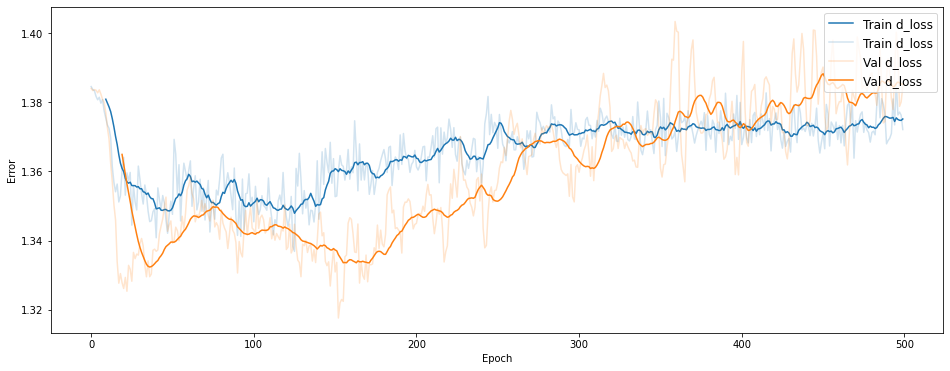

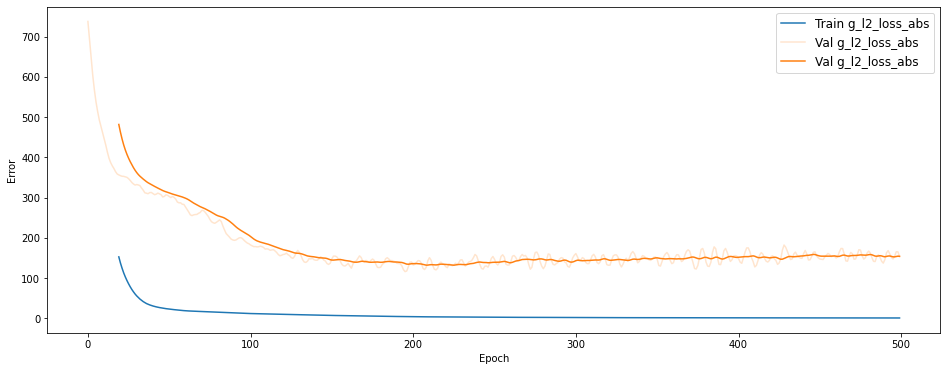

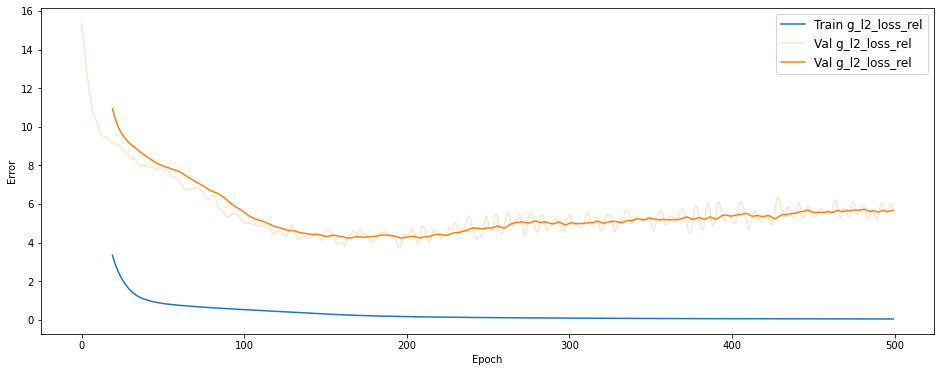

In [6]:
rs = [1, 20]

for label in labels[:3]:
    plt.plot(epoch, train_data[label].rolling(r).mean(), label=f"Train {label}", c=colors[0])
    if label == 'd_loss':
        plt.plot(epoch, train_data[label].rolling(rs[0]).mean(), label=f"Train {label}", alpha=float(rs[0]/5), c=colors[0])
    for r in rs:
        plt.plot(epoch, val_data[label].rolling(r).mean(), label=f"Val {label}", alpha=float(r/5), c=colors[1])
    #plt.ylim([0, 15])
    plt.ylabel("Error")
    plt.xlabel("Epoch")
    plt.legend(loc='upper right', fontsize='large')
    plt.show()
